In [1]:
import os
import numpy as np
import pandas as pd
import re

## Overview of model runs

In [41]:
topDirectory = ".././output/"#os.getcwd()
files = [path+'/'+file for path, d, f in os.walk(topDirectory) for file in f if file.endswith(".csv")]
overviewOfRuns = pd.concat([pd.DataFrame([np.array(re.split('[a-z-/.]+',files[n])[1:-1],dtype='int')]) 
           for n in range(0,len(files))])
overviewOfRuns.columns = ['Rows', 'Columns', 'Grid Option', 'Grazing',
                  'Initial Coral Percent', 'Initial Macroalgae Percent',
                      'r', 'd', 'a', 'y', 'Time', 'Record Rate', 'Number of Simulations']
overviewOfRuns = overviewOfRuns.set_index([pd.Series([n for n in range(0,len(files))])])
overviewOfRuns['File']=overviewOfRuns.index
overviewOfRuns

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations,File
0,15,15,0,60,20,10,10,40,20,75,5010,200,100,0
1,15,15,0,60,5,20,10,40,20,75,5010,200,100,1
2,15,15,0,60,10,5,10,40,20,75,5010,200,100,2
3,15,15,0,60,5,5,10,40,20,75,5010,200,100,3
4,15,15,0,60,10,20,10,40,20,75,5010,200,100,4
5,15,15,0,60,33,33,10,40,20,75,5010,200,100,5
6,15,15,0,60,20,20,10,40,20,75,5010,200,100,6
7,15,15,0,60,5,10,10,40,20,75,5010,200,100,7
8,15,15,0,60,20,5,10,40,20,75,5010,200,100,8
9,15,15,0,60,10,10,10,40,20,75,5010,200,100,9


## Choose Runs to Explore

In [43]:
subset = overviewOfRuns[(overviewOfRuns['Record Rate']==200) & 
               (overviewOfRuns['Rows'] == 15) & 
               (overviewOfRuns['Grazing']==50) |
               (overviewOfRuns['Grazing']==60)]

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

In [5]:
coralData

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,TurfPatchCount,MacroPatchCount,File
0,0,0,67,85,73,0.29,0.43,0.31,12,1,15,14,1
1,0,500,2,87,136,0.12,0.47,0.66,1,1,6,1,1
2,0,1000,0,75,150,0.00,0.38,0.67,1,1,8,2,1
3,0,1500,0,82,143,0.00,0.45,0.69,1,1,10,2,1
4,0,2000,0,71,154,0.00,0.36,0.71,1,1,16,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,99,3000,123,77,25,0.64,0.37,0.35,3,4,6,5,8
1096,99,3500,169,46,10,0.77,0.20,0.44,1,19,22,3,8
1097,99,4000,169,56,0,0.77,0.29,0.00,1,15,15,1,8
1098,99,4500,182,43,0,0.84,0.29,0.00,1,13,13,1,8


## Plot chosen Runs

### Coral Node Count v Time, Ordered by Model Runs

In [45]:
df.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation', figsize=(15,5), colormap='viridis')

NameError: name 'df' is not defined

### Count v Coral Node Count, Ordered by Model Runs

In [ ]:
coralData.hist(column='CoralCount', by='File', figsize=(10,10), layout=(len(filesOfInterest),1), sharex=True, sharey=True)

### Coral-Coral Neighbors v Coral Patch Count

In [ ]:
coralData.plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

# Exploring Variations in Grid Size / Initial Dist. and Grazing

In [ ]:
overviewOfRuns

## 15 X 15 Grazing 30, 40, 50, 60, 70

In [ ]:
filesOfInterest = [6, 3, 2, 0, 4]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(overviewOfRuns['Grazing'][f], len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

labels = [overviewOfRuns['Grazing'][index] for index in filesOfInterest]

In [ ]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [ ]:
coralData.groupby(['File']).plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

## 15 X 15, Grazing: 50, 55, Grid Option: Random, Blob

In [ ]:
filesOfInterest = [1,7]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

In [ ]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [ ]:
filesOfInterest = [5,8]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

In [ ]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [ ]:
coralData.groupby(['File']).plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))

## 20 X 20, Grazing: 50, 55, Grid Option: Random, Blob

In [ ]:
filesOfInterest = [9,11]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

In [ ]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [ ]:
filesOfInterest = [10,12]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

#labels = [overviewOfRuns['Grazing'][index] + ' ' overviewOfRuns['Grazing'][index]  for index in filesOfInterest]

overviewOfRuns.iloc[filesOfInterest,]

In [ ]:
coralData.groupby(['File']).plot.scatter(x='Timestep', y='CoralCount', c='Simulation',
                                         figsize=(15,5), colormap='viridis')

In [ ]:
## blob of same number of nodes, plot in percentage (instead of absolute values)

In [ ]:
overviewOfRuns

In [ ]:
filesOfInterest = [5,6,7,8]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData

In [ ]:
coralData.groupby(['Timestep'])['CoralCount'].mean(), coralData.groupby(['Timestep'])['CoralCount'].std()

In [ ]:
coralData.groupby(['File']).groupby(['Timestep']).scatter(x='CoralCount')

In [ ]:
overviewOfRuns

In [ ]:
overviewOfRuns.iloc[[1,7],]

# Random Grid, g .5  

In [ ]:
filesOfInterest = [1]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

# Blob Grid, g .5 

In [ ]:
filesOfInterest = [7]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

In [ ]:
overviewOfRuns.iloc[[5,8],]

## Random Grid, g=.55

In [ ]:
filesOfInterest = [5]
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

## Blob Grid, g=.55

In [ ]:
filesOfInterest = [8]
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

In [ ]:
overviewOfRuns.iloc[[9,10,11,12],]

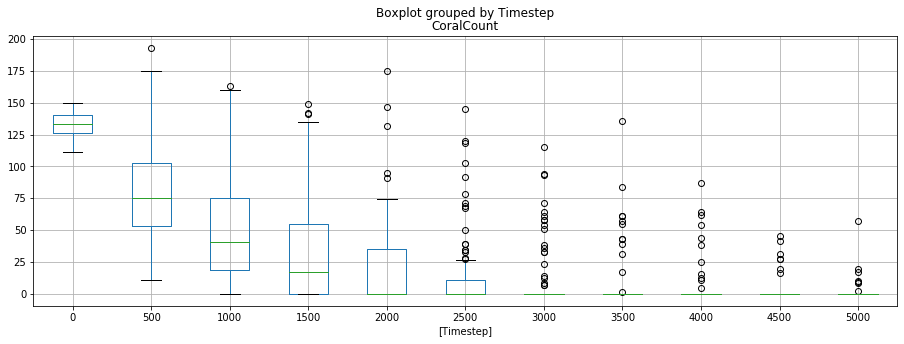

In [7]:
filesOfInterest = [9]
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

In [ ]:
filesOfInterest = [11]
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

In [ ]:
filesOfInterest = [10]
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

In [ ]:
filesOfInterest = [12]
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])
coralData.boxplot(column=['CoralCount'], by=['Timestep'],figsize=(15,5))

In [ ]:
## Vary initial concentrations of coral, lower bound of coral percent in order to return 
## save as percentage initially
## look into literature regarding patch size